# KG Generator Tool

## Let's get started by importing relevant libraries

In [ ]:
#pip install -r requirements.txt

In [3]:
from utils import *
from kg_gen_2 import *
from IPython.display import Markdown, display

## Please execute following cells

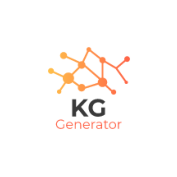

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: fkdlf
Ooops!! Did you have a typo in the name. Please try again!


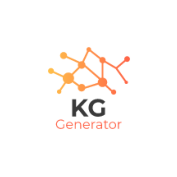

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: lkdsfkldaflka
Ooops!! Did you have a typo in the name. Please try again!


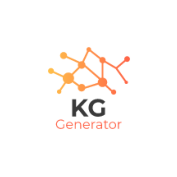

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: multiple scl


index,id,name
0,EFO_0003840,chronic progressive multiple sclerosis
1,EFO_0008520,primary progressive multiple sclerosis
2,EFO_0003929,relapsing-remitting multiple sclerosis
3,EFO_0008522,secondary progressive multiple sclerosis
4,MONDO_0005301,multiple sclerosis
5,MONDO_0017837,multiple sclerosis-ichthyosis-factor VIII deficiency syndrome
6,MONDO_0017838,sclerosteosis
7,MONDO_0016428,multiple sclerosis variant
8,MONDO_0043009,hereditary lethal multiple congenital anomalies/dysmorphic syndrome
9,MONDO_0010856,autosomal dominant polycystic kidney disease type 1 with tuberous sclerosis


<span style='color:None'>**Here you go! Hopefully your disease of interest is in the list. If so, let's get started.**</span>

Please enter the index value of your disease of interest. Input: 4


Please enter the clinical trial phase of chemicals which should be identified by the workflow. Use a number between 1 (early phase) and 4 (FDA approved). For example, if you use 3, the KG will fetch chemicals that are in phase 3. Also, remember that lower the input value, higher will be the number of identified chemicals and therefore the running time of workflow also increases.


Your desired clinical trial phase: 4


Please provide a name for you KG. Input: ms_test


We have identified 3512 proteins (Swiss-Prot) associated with the disease. Following is a histogram that shows distribution of proteins based on scores provided by OpenTargets. The scores are influenced by various factors such as genetic associations, expression, mutations, known pathways, targeting drugs and so on.

Displaying top 20 genes


Protein,ENSG,UniProt,Source,Score
NR3C1,ENSG00000113580,P04150,uniprot_swissprot,0.684692
HMGCR,ENSG00000113161,P04035,uniprot_swissprot,0.662116
KEAP1,ENSG00000079999,Q14145,uniprot_swissprot,0.635754
IL2RA,ENSG00000134460,P01589,uniprot_swissprot,0.611994
KCNH8,ENSG00000183960,Q96L42,uniprot_swissprot,0.611045
IFNAR1,ENSG00000142166,P17181,uniprot_swissprot,0.608327
S1PR1,ENSG00000170989,P21453,uniprot_swissprot,0.607919
IFNAR2,ENSG00000159110,P48551,uniprot_swissprot,0.606661
S1PR2,ENSG00000267534,O95136,uniprot_swissprot,0.602645
MS4A1,ENSG00000156738,P11836,uniprot_swissprot,0.602588


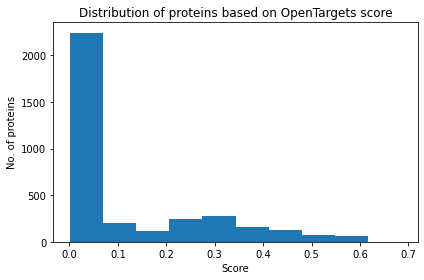



We recommend taking a threshold above 0.3 to exclude loosely associated proteins. 
Please enter your desired threshold: 0.6


Alright, we are good to go now. Your KG is now being generated! Sit back and relax!!

 Total no. of proteins:  12

    Protein             ENSG UniProt             Source     Score
0    NR3C1  ENSG00000113580  P04150  uniprot_swissprot  0.684692
1    HMGCR  ENSG00000113161  P04035  uniprot_swissprot  0.662116
2    KEAP1  ENSG00000079999  Q14145  uniprot_swissprot  0.635754
3    IL2RA  ENSG00000134460  P01589  uniprot_swissprot  0.611994
4    KCNH8  ENSG00000183960  Q96L42  uniprot_swissprot  0.611045
5   IFNAR1  ENSG00000142166  P17181  uniprot_swissprot  0.608327
6    S1PR1  ENSG00000170989  P21453  uniprot_swissprot  0.607919
7   IFNAR2  ENSG00000159110  P48551  uniprot_swissprot  0.606661
8    S1PR2  ENSG00000267534  O95136  uniprot_swissprot  0.602645
9    MS4A1  ENSG00000156738  P11836  uniprot_swissprot  0.602588
10   S1PR3  ENSG00000213694  Q99500  unip

Fetching Protein-related info:   0%|          | 0/12 [00:00<?, ?it/s]

A total of 69 drugs have been identified. Now fetching relevant data


Retrieving mechanisms from ChEMBL:   0%|          | 0/69 [00:00<?, ?it/s]

Retrieving bioassays from ChEMBL:   0%|          | 0/69 [00:00<?, ?it/s]

Filtering UniProt proteins from ChEMBL:   0%|          | 0/69 [00:00<?, ?it/s]

Filtering human proteins from ChEMBL:   0%|          | 0/68 [00:00<?, ?it/s]

Populating ChEMBL data for human proteins:   0%|          | 0/68 [00:00<?, ?it/s]

Populating Uniprot edges:   0%|          | 0/12 [00:00<?, ?it/s]

Populating Chemical-MoA edges:   0%|          | 0/54 [00:00<?, ?it/s]

Adding bioassay edges to BEL:   0%|          | 0/22 [00:00<?, ?it/s]

Retrieving Adverse Effects for each drug:   0%|          | 0/69 [00:00<?, ?it/s]

A total of 1022 SNPs have been identified from DisGeNET. Now adding relevant data




Adding disease associated SNPs:   0%|          | 0/803 [00:00<?, ?it/s]

Your KG is now generated! 

Now let's save all the files that were created in the process. 

Please enter the location (e.g. 'C:\Users\rkarki\Documents\kg\' ) where KG files should be stored. A folder will be created automatically. 

Input: C:\Users\reagon.karki\Documents\GitHub\kgg\data\kgs\test\


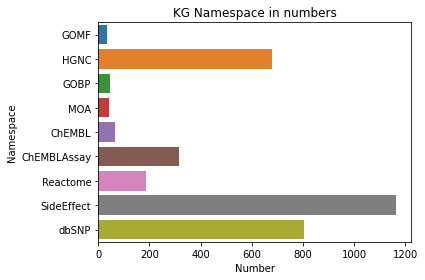

In [13]:
kg = createKG()

In [5]:
kg.summarize

Name,ad_t
Version,0.0.1
Nodes,3216
Namespaces,9
Edges,6428
Annotations,0
Citations,4
Authors,0
Components,658
Warnings,0
Network Density,0.000622


In [ ]:
to_jupyter(kg)

In [ ]:
KG_namespace_plot(kg)

# Additional stuff

In [6]:
infile= open('data/kgs/ndd/ad/ad.pkl','rb')
graph= pickle.load(infile)
infile.close()

In [7]:
graph.summarize

Name,ad
Version,0.0.1
Nodes,11360
Namespaces,9
Edges,40328
Annotations,0
Citations,4
Authors,0
Components,548
Warnings,0
Network Density,0.000313


In [8]:
prot = pd.read_csv('data/kgs/ndd/ad/diseaseAssociatedProteins.csv')
prot = list(prot['Protein'])
prot = prot[1:6]

chem = pd.read_csv('data/kgs/ndd/ad/diseaseAssociatedDrugs.csv')
chem = list(chem['drugId'])
chem = chem[1:6]

prot_chem = prot + chem

In [9]:
prot_chem

['PSEN1',
 'GRIN1',
 'CDK5',
 'PSEN2',
 'SORL1',
 'CHEMBL3707183',
 'CHEMBL1699',
 'CHEMBL1678',
 'CHEMBL659',
 'CHEMBL807']

In [10]:
query_graph = filter_graph(graph,prot_chem)

In [11]:
to_jupyter(query_graph)

<IPython.core.display.Javascript object>

In [12]:
prtn_attr = nx.get_node_attributes(graph,'UniProt')
bionote_attr = nx.get_node_attributes(graph,'3Dbio')

for node in graph.nodes():
    unique_node = []
    
    if node.name in prot:
        if node not in unique_node:
            
            unique_node.append(node)
            print(node.name)
       
            if isinstance(node,pybel.dsl.Abundance):
                print(chem_attr[node])
                
            if isinstance(node,pybel.dsl.Protein):
                print(prtn_attr[node])
                
            if isinstance(node,pybel.dsl.Protein):
                print(bionote_attr[node])

PSEN1
https://www.uniprot.org/uniprotkb/P49768
https://3dbionotes.cnb.csic.es/?queryId=P49768
GRIN1
https://www.uniprot.org/uniprotkb/Q05586
https://3dbionotes.cnb.csic.es/?queryId=Q05586
CDK5
https://www.uniprot.org/uniprotkb/Q00535
https://3dbionotes.cnb.csic.es/?queryId=Q00535
PSEN2
https://www.uniprot.org/uniprotkb/P49810
https://3dbionotes.cnb.csic.es/?queryId=P49810
SORL1
https://www.uniprot.org/uniprotkb/Q92673
https://3dbionotes.cnb.csic.es/?queryId=Q92673
